In [1]:
%load_ext autoreload
%autoreload 2 

In [64]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 2

plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=15)  
plt.rc('figure', titlesize=18) 

sns.set_palette("Set2")

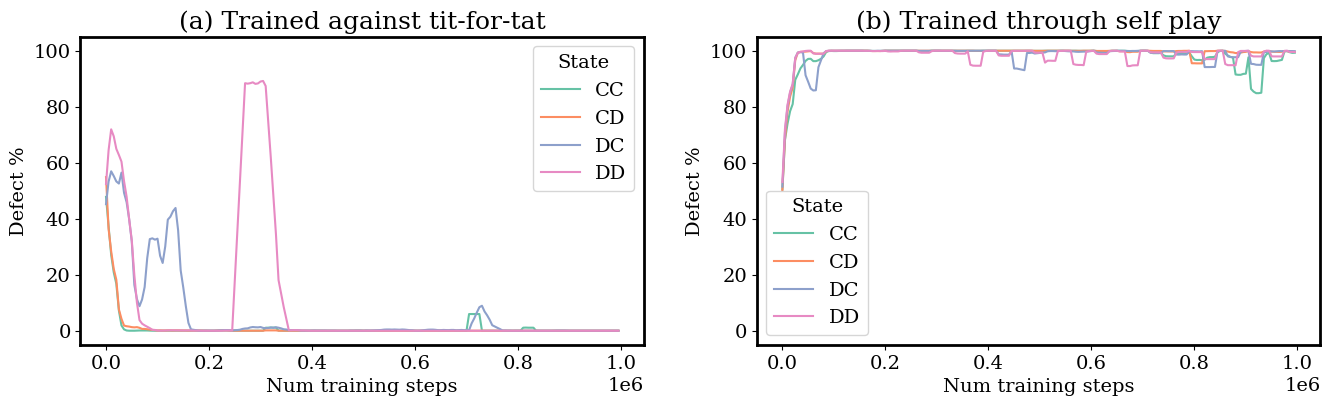

In [68]:
def plot_results(results_file, title, ax):
    with open(results_file, "rb") as f:
        results = pickle.load(f)
        
    results = results["a2c"]

    to_df = []
    for i, result in enumerate(results):
        policy_samples = result["policy_estimate"]

        for k, row in policy_samples.iterrows():
            if i == 0:
                to_df.append({
                    "State": k,
                    "pct_D": np.random.uniform(45, 55),
                    "Num training steps": 0
                })

            to_df.append({
                "State": k,
                "pct_D": row["pct_D"],
                "Num training steps": (i+1) * 5 * 1000
            })
        
        # if i > 90:
        #     print(result)

    df = pd.DataFrame(to_df)

    ma_dfs = []
    for state in df["State"].unique():
        state_df = df[df["State"] == state].copy()
        state_df["Defect %"] = state_df["pct_D"].rolling(window=5, min_periods=1).mean()
        ma_dfs.append(state_df)

    ma_df = pd.concat(ma_dfs)
    sns.lineplot(data=ma_df, x="Num training steps", y="Defect %", hue="State", ax=ax),

    # df = df.set_index("Num training steps")
    # df = df.dropna()

    ax.set_title(title)
    ax.set_ylim(-5, 105)
    # sns.lineplot(data=df, x="Num training steps", y="Defect %", hue="State", ax=ax),


fig, axes = plt.subplots(1, 2, figsize=(16, 4))
# plot_results("vs_pavlov.pkl", "(b) Small defection benefit (self-play)", axes[1])
plot_results("vs_tit_for_tat.pkl", "(a) Trained against tit-for-tat", axes[0])
plot_results("default.pkl", "(b) Trained through self play", axes[1])

plt.savefig("training_comparison.png", bbox_inches='tight', dpi=300)
# plot_results("vs_pavlov.pkl", "(c) Moderate defection benefit (vs pavlov)", axes[1])

{'policy_estimate':      defect_count  total  pct_D
CC0            50     50  100.0
CC1            50     50  100.0
CC2            50     50  100.0
CC3            49     50   98.0
CC4            29     50   58.0
CC5            37     50   74.0
CC6            50     50  100.0
CC7            50     50  100.0
CC8            50     50  100.0
CC9            44     50   88.0
CD0            50     50  100.0
CD1            50     50  100.0
CD2            50     50  100.0
CD3            50     50  100.0
CD4            50     50  100.0
CD5            50     50  100.0
CD6            50     50  100.0
CD7            50     50  100.0
CD8            50     50  100.0
CD9            49     50   98.0
DC0            50     50  100.0
DC1            49     50   98.0
DC2            50     50  100.0
DC3            50     50  100.0
DC4            41     50   82.0
DC5            34     50   68.0
DC6            50     50  100.0
DC7            50     50  100.0
DC8            50     50  100.0
DC9            46   

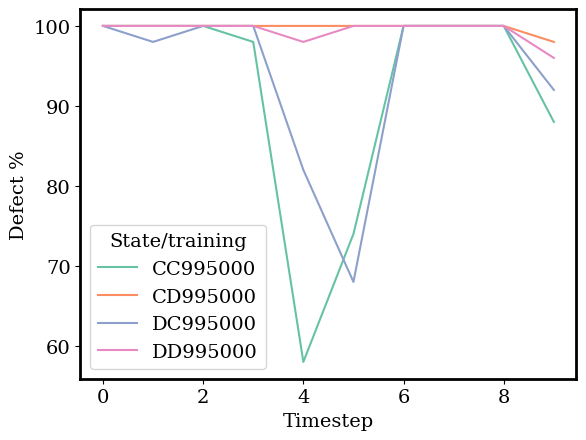

In [71]:
results_file = "timestep_fixed_self.pkl"
with open(results_file, "rb") as f:
    results = pickle.load(f)

    results = results["a2c"]

    to_df = [] 
    # for i, result in enumerate(results):
    result = results[-25]
        # if i % 25 != 0: continue
    print(result)
    policy_samples = result["policy_estimate"]

    for k, row in policy_samples.iterrows():
        to_df.append({
            "State/training": k[:2] + str((i+1) * 5 * 1000),
            "Defect %": row["pct_D"],
            "Timestep": int(k[-1])
            # "Num training steps": (i+1) * 5 * 1000
        })
        
    df = pd.DataFrame(to_df)
    sns.lineplot(data=df, x="Timestep", y="Defect %", hue="State/training"),

In [24]:
max(min(np.random.geometric(p=0.2), 10), 1)

10

In [73]:
np.random.geometric(p=0.2)

11